# Funtion for plotting the time series of the sensors for the highest and the lowest polution

In [4]:
import requests
import datetime
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [5]:
from ipynb.fs.full.Load_Data import load_data
from ipynb.fs.full.Clean_Data import remove_missing
from ipynb.fs.full.Clean_Data import remove_outliers

In [10]:
df = load_data(lat_start = 48, lat_end = 49, long_start = 9, long_end = 10, start_year = 2018, start_month = 4, start_day = 30, delta_hours = 1)
df = remove_outliers(df, method = "quantile")

212 outlier observations were deleted


In [11]:
df

,measurement_PM10,measurement_PM2.5,time,lat,lon,sensor_id,measurement_id
0,23.10,5.93,2018-04-30T00:00:01Z,48.787,9.011,179,179_2018-04-30T00:00:01Z
1,NaN,NaN,2018-04-30T00:00:01Z,48.600,9.641,3283,3283_2018-04-30T00:00:01Z
2,NaN,NaN,2018-04-30T00:00:01Z,48.509,9.052,516,516_2018-04-30T00:00:01Z
3,8.43,6.60,2018-04-30T00:00:01Z,48.630,9.162,495,495_2018-04-30T00:00:01Z
4,NaN,NaN,2018-04-30T00:00:01Z,48.630,9.162,498,498_2018-04-30T00:00:01Z
...,...,...,...,...,...,...,...
28086,NaN,NaN,2018-04-30T00:59:59Z,48.790,9.846,6172,6172_2018-04-30T00:59:59Z
28087,17.57,2.80,2018-04-30T00:59:59Z,48.487,9.231,3567,3567_2018-04-30T00:59:59Z
28088,NaN,NaN,2018-04-30T00:59:59Z,48.747,9.175,9915,9915_2018-04-30T00:59:59Z
28089,1.20,0.90,2018-04-30T00:59:59Z,48.810,9.173,8938,8938_2018-04-30T00:59:59Z


In [12]:
def plot_average_pol(df):
    '''Function to plot the time series of the polution of the sensors with the highest/lowest average polution over time'''
    
    '''INPUT:'''
    
    '''df:                         dataframe out of load_data function, where missing measurements are removed'''
    
    '''OUTPUT:'''
    
    '''time series of the polution of the sensors; one per measurement (PM10 and PM2.5)'''
    
    '''Check whether data frame contains any NaN, if yes: remove'''
    if df.isnull().values.any() == True:
        df = remove_missing(df)
    
    '''Find maximum and minimum avergae polututed sensor_id'''
    # For PM10:
    max_PM10 = max(df.groupby("sensor_id").mean()['measurement_PM10'])                                                       # group data by sensor_id, average the measurements, save maximum of measurement_PM10
    min_PM10 = min(df.groupby("sensor_id").mean()['measurement_PM10'])
    max_PM10_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM10'] == max_PM10].index[0]    # get sensor_id of maximum average measurement
    min_PM10_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM10'] == min_PM10].index[0]
    df_max_PM10 = df.loc[df['sensor_id'] == max_PM10_id]                                                                     # get data frame that contains only measurements of the sensor with maximum average observations
    df_min_PM10 = df.loc[df['sensor_id'] == min_PM10_id]
    
    # For PM2.5
    max_PM25 = max(df.groupby("sensor_id").mean()['measurement_PM2.5'])
    min_PM25 = min(df.groupby("sensor_id").mean()['measurement_PM2.5'])
    max_PM25_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM2.5'] == max_PM25].index[0]
    min_PM25_id = df.groupby("sensor_id").mean()[df.groupby("sensor_id").mean()['measurement_PM2.5'] == min_PM25].index[0]
    df_max_PM25 = df.loc[df['sensor_id'] == max_PM25_id]
    df_min_PM25 = df.loc[df['sensor_id'] == min_PM25_id]
    
    '''Plot maximum and minimum average polututed time series per measurement and maximum/minumum'''
    # Initialize two subplots for PM10 (min and max)
    fig1, ax1 = plt.subplots(1, 2, sharey = False, figsize = (10, 6))
    
    # define each subplot
    ax1[0].plot(df_max_PM10.time, df_max_PM10.measurement_PM10, label='average max.', c = 'red')                             # get time on x-axis, the measurement on y-axis
    ax1[0].set_xlabel('Time')                                                                                                # set labels and titles
    ax1[0].set_ylabel('μg/m³')
    ax1[0].set_title('Polution over requested time (threshold: PM10)')
    ax1[0].grid(True)                                                                                                        # activate background grid
    ax1[0].legend(loc='upper left')                                                                                          # add legend
    ax1[0].xaxis.set_major_locator(plt.MaxNLocator(10))                                                                      # reducing maximum number of x-axis ticks to 10 for better readableness
    
    ax1[1].plot(df_min_PM10.time, df_min_PM10.measurement_PM10, label='average min.', c = 'darkblue')
    ax1[1].set_xlabel('Time')
    ax1[1].set_ylabel('μg/m³')
    ax1[1].set_title('Polution over requested time (threshold: PM10)')
    ax1[1].grid(True)
    ax1[1].legend(loc='upper left')
    ax1[1].xaxis.set_major_locator(plt.MaxNLocator(10))
    
    fig1.autofmt_xdate(rotation = 45)
    
    # Initialize two subplots for PM2.5 (min and max)
    fig2, ax2 = plt.subplots(1, 2, sharey = False, figsize = (10, 6))
    
    # define each subplot
    ax2[0].plot(df_max_PM25.time, df_max_PM25['measurement_PM2.5'], label='average max.', c = 'red')
    ax2[0].set_xlabel('Time')
    ax2[0].set_ylabel('μg/m³')
    ax2[0].set_title('Polution over requested time (threshold: PM2.5)')
    ax2[0].grid(True)
    ax2[0].legend(loc='upper left')
    ax2[0].xaxis.set_major_locator(plt.MaxNLocator(10))
    
    ax2[1].plot(df_min_PM25.time, df_min_PM25['measurement_PM2.5'], label='average min.', c = 'darkblue')
    ax2[1].set_xlabel('Time')
    ax2[1].set_ylabel('μg/m³')
    ax2[1].set_title('Polution over requested time (threshold: PM2.5)')
    ax2[1].grid(True)
    ax2[1].legend(loc='upper left')
    ax2[1].xaxis.set_major_locator(plt.MaxNLocator(10))
    
    fig2.autofmt_xdate(rotation = 45)


13544 observations with missing values were removed from the data frame


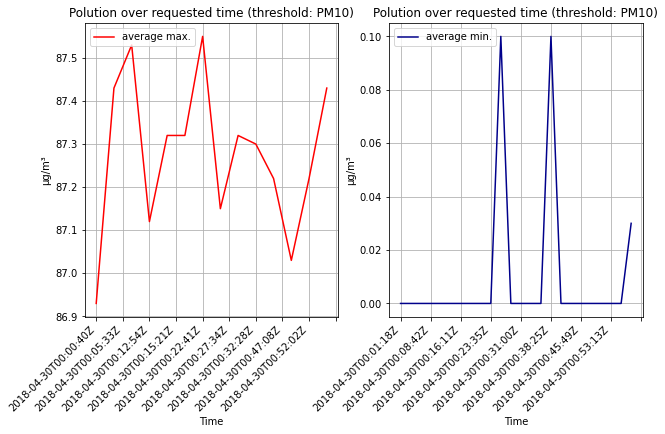

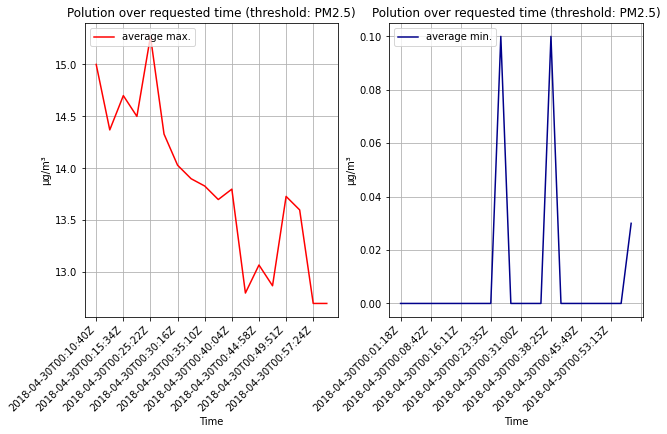

In [13]:
plot_average_pol(df)

In [3]:
pip install ipynb

  Using cached ipynb-0.5.1-py3-none-any.whl (6.9 kB)
Note: you may need to restart the kernel to use updated packages.
